# IN-PROGRESS
### `2 S <-> U` and `S <-> X` (both mostly forward)

## Based on the experiment `up_regulate_3"

1st-order kinetics throughout.   

LAST REVISED: Feb. 8, 2023

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(2)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from src.modules.reactions.reaction_data import ReactionData as chem
from src.modules.reactions.reaction_dynamics import ReactionDynamics

import numpy as np
import plotly.express as px
from src.modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_1"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'large_time_steps_2.log.htm'


### Initialize the system

In [4]:
# Initialize the system
chem_data = chem(names=["U", "X", "S"])

# Reaction 2 S <-> U , with 1st-order kinetics for all species
chem_data.add_reaction(reactants=[(2, "S")], products="U",
                       forward_rate=8., reverse_rate=2.)

# Reaction S <-> X , with 1st-order kinetics for all species
chem_data.add_reaction(reactants="S", products="X",
                       forward_rate=6., reverse_rate=3.)

chem_data.describe_reactions()

# Send the plot of the reaction network to the HTML log file
graph_data = chem_data.prepare_graph_network()
GraphicLog.export_plot(graph_data, "vue_cytoscape_1")

Number of reactions: 2 (at temp. 25 C)
0: 2 S <-> U  (kF = 8 / kR = 2 / Delta_G = -3,436.56 / K = 4) | 1st order in all reactants & products
1: S <-> X  (kF = 6 / kR = 3 / Delta_G = -1,718.28 / K = 2) | 1st order in all reactants & products
[GRAPHIC ELEMENT SENT TO LOG FILE `large_time_steps_2.log.htm`]


### Run 1 : extremely small fixed time steps (no substeps)

In [13]:
dynamics = ReactionDynamics(reaction_data=chem_data)
dynamics.set_conc(conc={"U": 50., "X": 100., "S": 0.})
#dynamics.describe_state()

dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(time_step=0.001, stop_time=0.8)

df = dynamics.get_history()
#df
dynamics.explain_time_advance()

800 total step(s) taken
From time 0 to 0.8, in 800 FULL steps of 0.001
(for a grand total of 800 full steps)


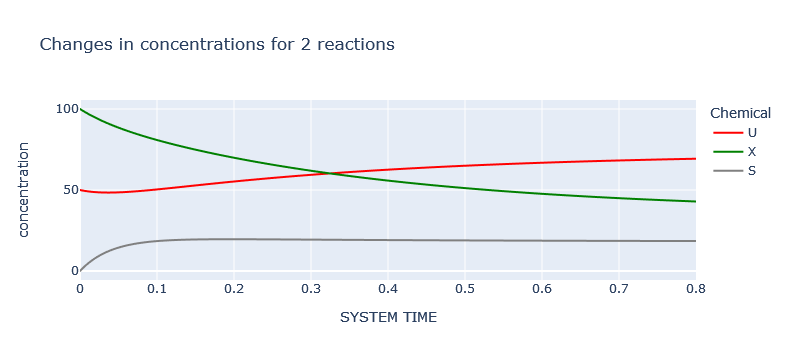

In [14]:
dynamics.plot_curves(colors=['red', 'green', 'gray'])

### Run 2 : very small time steps, with dynamic substeps

In [15]:
dynamics = ReactionDynamics(reaction_data=chem_data)
dynamics.set_conc(conc={"U": 50., "X": 100., "S": 0.})
#dynamics.describe_state()

dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(time_step=0.01, stop_time=0.8,
                                  dynamic_substeps=4, rel_fast_threshold=50)

df = dynamics.get_history()
#df
dynamics.explain_time_advance()

single_compartment_react(): setting abs_fast_threshold to 50.0
80 total step(s) taken
From time 0 to 0.44, in 176 substeps of 0.0025 (each 1/4 of full step)
From time 0.44 to 0.8, in 36 FULL steps of 0.01
(for a grand total of 80 full steps)


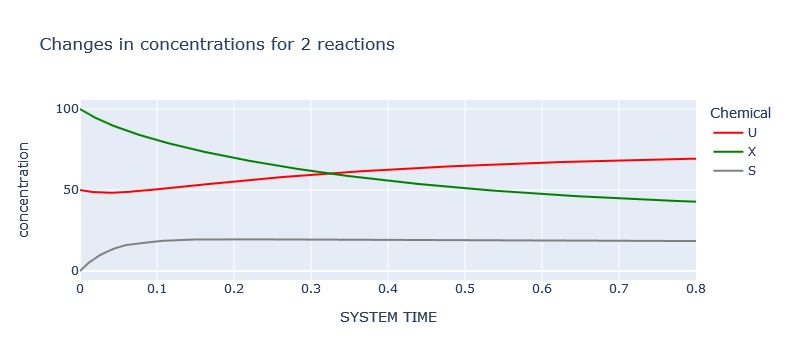

In [16]:
dynamics.plot_curves(colors=['red', 'green', 'gray'])

### Run 3 : small-ish time steps, with dynamic substeps

In [33]:
dynamics = ReactionDynamics(reaction_data=chem_data)
dynamics.set_conc(conc={"U": 50., "X": 100., "S": 0.})
#dynamics.describe_state()

dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(time_step=0.08, stop_time=0.8,
                                  dynamic_substeps=4, rel_fast_threshold=250)

df = dynamics.get_history()
#df
dynamics.explain_time_advance()

single_compartment_react(): setting abs_fast_threshold to 31.25
11 total step(s) taken
From time 0 to 0.64, in 32 substeps of 0.02 (each 1/4 of full step)
From time 0.64 to 0.88, in 3 FULL steps of 0.08
(for a grand total of 11 full steps)


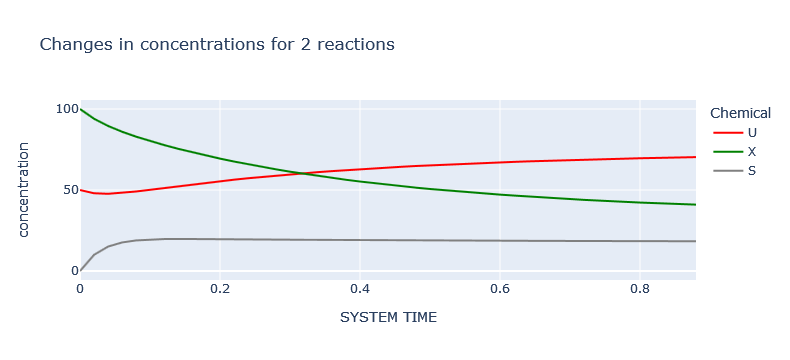

In [34]:
dynamics.plot_curves(colors=['red', 'green', 'gray'])

### Run 4 : same as previous run, but fewer dynamic substeps

In [31]:
dynamics = ReactionDynamics(reaction_data=chem_data)
dynamics.set_conc(conc={"U": 50., "X": 100., "S": 0.})
#dynamics.describe_state()

dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(time_step=0.08, stop_time=0.8,
                                  dynamic_substeps=2, rel_fast_threshold=150)

df = dynamics.get_history()
#df
dynamics.explain_time_advance()

single_compartment_react(): setting abs_fast_threshold to 18.75
11 total step(s) taken
From time 0 to 0.8, in 20 substeps of 0.04 (each 1/2 of full step)
From time 0.8 to 0.88, in 1 FULL step of 0.08
(for a grand total of 11 full steps)


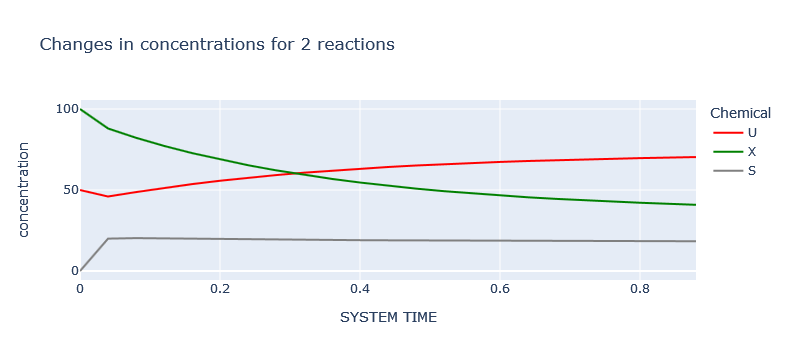

In [32]:
dynamics.plot_curves(colors=['red', 'green', 'gray'])

### Run 5 : same as previous run, but slightly larger primary step

In [35]:
dynamics = ReactionDynamics(reaction_data=chem_data)
dynamics.set_conc(conc={"U": 50., "X": 100., "S": 0.})
#dynamics.describe_state()

dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(time_step=0.1, stop_time=0.8,
                                  dynamic_substeps=2, rel_fast_threshold=150)

df = dynamics.get_history()
#df
dynamics.explain_time_advance()

single_compartment_react(): setting abs_fast_threshold to 15.0
9 total step(s) taken
From time 0 to 0.9, in 18 substeps of 0.05 (each 1/2 of full step)
(for a grand total of 9 full steps)


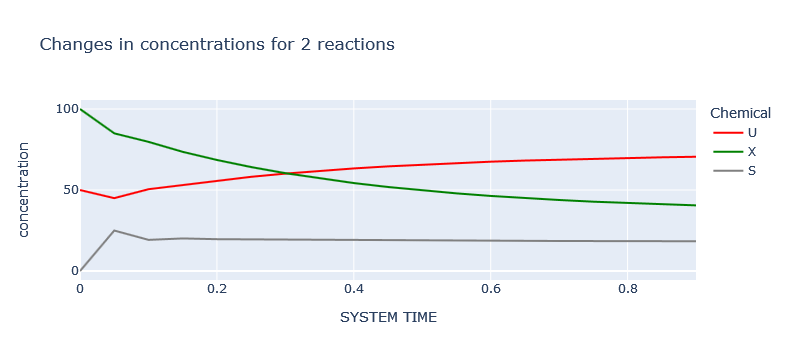

In [36]:
dynamics.plot_curves(colors=['red', 'green', 'gray'])

### Run 6 : same as previous run, but no substeps

In [37]:
dynamics = ReactionDynamics(reaction_data=chem_data)
dynamics.set_conc(conc={"U": 50., "X": 100., "S": 0.})
#dynamics.describe_state()

dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(time_step=0.1, stop_time=0.8)

df = dynamics.get_history()
#df
dynamics.explain_time_advance()

The computation took 2 extra step(s) - automatically added to prevent negative concentrations
10 total step(s) taken
From time 0 to 0.1, in 1 FULL step of 0.1
From time 0.1 to 0.15, in 1 substep of 0.05 (1/2 of full step)
From time 0.15 to 0.65, in 5 FULL steps of 0.1
From time 0.65 to 0.7, in 1 substep of 0.05 (1/2 of full step)
From time 0.7 to 0.9, in 2 FULL steps of 0.1
(for a grand total of 10 full steps)


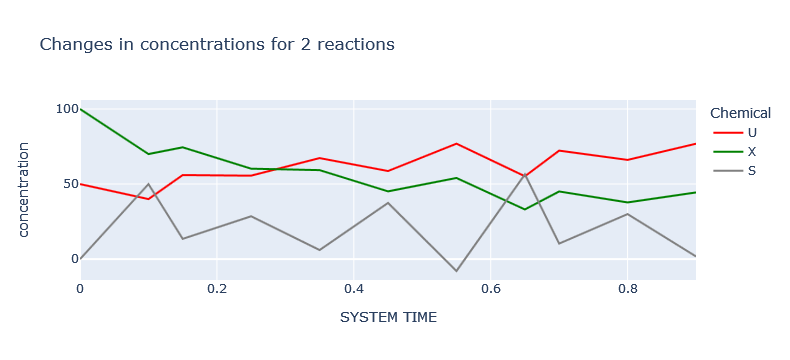

In [38]:
dynamics.plot_curves(colors=['red', 'green', 'gray'])